In [1]:
from dataAnalysis.DataAnalysis import DataAnalysis
import pandas as pd
from dataAnalysis.Constants import FEATURES, SEX_CATEGORY_COLUMN_NAME, FEATURES_IN_TABLE

data = pd.read_csv(r"extdata/sbcdata.csv", header=0)
data_analysis = DataAnalysis(data)
mimic_sbc = pd.read_csv("hosp_mimic_i.csv")

/home/dwalke/git/sbc/dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Training: 
Assessable data are 528101 cases and 1015074 CBCs
Control data are 527038 cases and 1013548 CBCs
Sepsis data are 1488 cases and 1526 CBCs
$$$$$$$$$$$$$$$$$$$$
Testing: 


/home/dwalke/git/sbc/dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Controls: 365794, Sepsis: 490
Assessable data are 180494 cases and 366284 CBCs
Control data are 180157 cases and 365794 CBCs
Sepsis data are 472 cases and 490 CBCs


/home/dwalke/git/sbc/dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']


Controls: 437629, Sepsis: 448
Assessable data are 157922 cases and 438077 CBCs
Control data are 180157 cases and 437629 CBCs
Sepsis data are 438 cases and 448 CBCs


In [2]:
mimic_sbc = mimic_sbc.dropna(subset=FEATURES_IN_TABLE)
mimic_sbc.loc[:, SEX_CATEGORY_COLUMN_NAME] = mimic_sbc["Sex"] == "W"
mimic_sbc[SEX_CATEGORY_COLUMN_NAME] = mimic_sbc[SEX_CATEGORY_COLUMN_NAME].astype(int)

In [3]:
X_sbc = data_analysis.get_X_train() 
X_mimic = mimic_sbc.loc[:, FEATURES].values

X_test = data_analysis.get_X_test()
X_gw_test = data_analysis.get_X_gw()

y_sbc = data_analysis.get_y_train()
y_mimic = mimic_sbc.loc[:,"Label"].values
y_test = data_analysis.get_y_test()
y_gw_test = data_analysis.get_y_gw()

In [4]:
import numpy as np
X = np.concatenate((X_sbc, X_mimic), axis = 0)
y = np.concatenate((y_sbc, y_mimic), axis = 0)

In [5]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)

In [6]:
from dataAnalysis.Metrics import Evaluation

evaluation = Evaluation(y_test, y_gw_test, X_test, X_gw_test)

/home/dwalke/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [11]:
from sklearn.model_selection import GridSearchCV

def get_best_estimator(model, param_grid):
    grid = GridSearchCV(
    n_jobs=-1,
    cv=10,
    estimator=model,
    scoring='roc_auc',
    refit='auroc',
    return_train_score=True,
    param_grid=param_grid,
    verbose= 10
    )
    grid.fit(X, y)
    return grid.best_estimator_

In [12]:
counts[0]/ counts[1]

42.12101505509855

In [25]:
from xgboost import XGBClassifier
param_grid = {
    'max_depth': [8, 10],
    'learning_rate': [0.1],
    'gamma': [0],
    'reg_lambda': [0],
    'scale_pos_weight': [i for i in range(5, 65, 5)],
    "min_child_weight": [2],
    "max_delta_step": [2],
    'n_estimators': [5, 10, 20, 50, 100, 200, 400, 500, 600, 700, 800, 900]
}
xgb_classifier = get_best_estimator(XGBClassifier(tree_method='gpu_hist', gpu_id = 2,
                                                        seed = 42), param_grid)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
[CV 5/10; 1/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=5
[CV 5/10; 1/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=5;, score=(train=0.819, test=0.729) total time=   8.5s
[CV 7/10; 7/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=35
[CV 7/10; 7/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=35;, score=(train=0.821, test=0.743) total time=   6.5s
[CV 7/10; 8/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40
[CV 7/10; 8/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_dept

[CV 8/10; 3/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15
[CV 8/10; 3/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15;, score=(train=0.822, test=0.714) total time=   8.2s
[CV 6/10; 7/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=35
[CV 6/10; 7/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=35;, score=(train=0.820, test=0.749) total time=   6.6s
[CV 6/10; 8/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40
[CV 6/10; 8/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_po

[CV 4/10; 7/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=35
[CV 4/10; 7/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=35;, score=(train=0.807, test=0.866) total time=  19.2s
[CV 7/10; 9/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=45
[CV 7/10; 9/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=45;, score=(train=0.820, test=0.744) total time=   8.0s
[CV 9/10; 15/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=15
[CV 9/10; 15/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scal

[CV 9/10; 4/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20
[CV 9/10; 4/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20;, score=(train=0.820, test=0.737) total time=  22.9s
[CV 10/10; 13/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=5
[CV 10/10; 13/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=5;, score=(train=0.824, test=0.729) total time=  10.4s
[CV 5/10; 21/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=45
[CV 5/10; 21/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, 

[CV 3/10; 2/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10
[CV 3/10; 2/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10;, score=(train=0.802, test=0.905) total time=   9.9s
[CV 9/10; 7/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=35
[CV 9/10; 7/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=35;, score=(train=0.821, test=0.734) total time=   8.3s
[CV 5/10; 10/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=50
[CV 5/10; 10/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_

[CV 2/10; 6/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30
[CV 2/10; 6/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30;, score=(train=0.804, test=0.905) total time=  20.7s
[CV 6/10; 10/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=50
[CV 6/10; 10/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=50;, score=(train=0.820, test=0.749) total time=   8.8s
[CV 4/10; 17/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=25
[CV 4/10; 17/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, sc

[CV 4/10; 4/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20
[CV 4/10; 4/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20;, score=(train=0.806, test=0.865) total time=  21.2s
[CV 9/10; 10/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=50
[CV 9/10; 10/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=50;, score=(train=0.820, test=0.733) total time=   8.8s
[CV 9/10; 17/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=25
[CV 9/10; 17/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, sc

[CV 8/10; 4/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20
[CV 8/10; 4/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20;, score=(train=0.822, test=0.715) total time=  22.3s
[CV 7/10; 11/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=55
[CV 7/10; 11/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=55;, score=(train=0.819, test=0.742) total time=   9.2s
[CV 9/10; 18/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=30
[CV 9/10; 18/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, sc

[CV 9/10; 2/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10
[CV 9/10; 2/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10;, score=(train=0.819, test=0.736) total time=  22.8s
[CV 6/10; 12/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60
[CV 6/10; 12/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60;, score=(train=0.819, test=0.746) total time=   8.7s
[CV 8/10; 18/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=30
[CV 8/10; 18/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, sc

[CV 2/10; 3/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15
[CV 2/10; 3/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15;, score=(train=0.803, test=0.902) total time=  20.2s
[CV 8/10; 9/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=45
[CV 8/10; 9/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=45;, score=(train=0.822, test=0.714) total time=   8.9s
[CV 4/10; 16/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=20
[CV 4/10; 16/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scal

[CV 10/10; 3/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15
[CV 10/10; 3/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15;, score=(train=0.820, test=0.726) total time=  23.1s
[CV 1/10; 12/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60
[CV 1/10; 12/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60;, score=(train=0.805, test=0.890) total time=   9.9s
[CV 3/10; 19/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=35
[CV 3/10; 19/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, 

[CV 6/10; 2/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10
[CV 6/10; 2/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10;, score=(train=0.819, test=0.749) total time=  18.0s
[CV 8/10; 8/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40
[CV 8/10; 8/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40;, score=(train=0.822, test=0.714) total time=   8.9s
[CV 6/10; 15/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=15
[CV 6/10; 15/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scal

[CV 2/10; 2/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10
[CV 2/10; 2/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10;, score=(train=0.803, test=0.902) total time=  23.0s
[CV 9/10; 12/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60
[CV 9/10; 12/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60;, score=(train=0.820, test=0.732) total time=   8.6s
[CV 3/10; 18/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=30
[CV 3/10; 18/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, sc

[CV 10/10; 6/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30
[CV 10/10; 6/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30;, score=(train=0.821, test=0.728) total time=  21.7s
[CV 4/10; 11/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=55
[CV 4/10; 11/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=55;, score=(train=0.806, test=0.866) total time=   8.7s
[CV 7/10; 18/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=30
[CV 7/10; 18/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, 

[CV 4/10; 6/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30
[CV 4/10; 6/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30;, score=(train=0.806, test=0.864) total time=  22.5s
[CV 10/10; 11/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=55
[CV 10/10; 11/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=55;, score=(train=0.820, test=0.726) total time=   6.9s
[CV 2/10; 17/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=25
[CV 2/10; 17/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, 

[CV 6/10; 4/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20
[CV 6/10; 4/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20;, score=(train=0.820, test=0.749) total time=  15.3s
[CV 2/10; 8/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40
[CV 2/10; 8/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40;, score=(train=0.803, test=0.905) total time=   6.5s
[CV 4/10; 14/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=10
[CV 4/10; 14/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scal

[CV 7/10; 4/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20
[CV 7/10; 4/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20;, score=(train=0.820, test=0.742) total time=  17.8s
[CV 2/10; 9/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=45
[CV 2/10; 9/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=45;, score=(train=0.804, test=0.906) total time=   7.5s
[CV 3/10; 15/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=15
[CV 3/10; 15/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scal

[CV 5/10; 2/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10
[CV 5/10; 2/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10;, score=(train=0.821, test=0.732) total time=  18.9s
[CV 4/10; 9/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=45
[CV 4/10; 9/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=45;, score=(train=0.806, test=0.866) total time=   9.4s
[CV 3/10; 16/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=20
[CV 3/10; 16/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scal

[CV 5/10; 3/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15
[CV 5/10; 3/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15;, score=(train=0.821, test=0.733) total time=  22.4s
[CV 8/10; 11/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=55
[CV 8/10; 11/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=55;, score=(train=0.822, test=0.714) total time=   8.5s
[CV 10/10; 17/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=25
[CV 10/10; 17/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, 

[CV 1/10; 4/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20
[CV 1/10; 4/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20;, score=(train=0.806, test=0.888) total time=  22.3s
[CV 4/10; 12/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60
[CV 4/10; 12/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60;, score=(train=0.807, test=0.868) total time=   9.7s
[CV 4/10; 19/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=35
[CV 4/10; 19/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, sc

[CV 4/10; 5/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=25
[CV 4/10; 5/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=25;, score=(train=0.807, test=0.866) total time=  23.2s
[CV 6/10; 13/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=5
[CV 6/10; 13/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=5;, score=(train=0.823, test=0.751) total time=   7.9s
[CV 2/10; 18/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=30
[CV 2/10; 18/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, sc

[CV 9/10; 6/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30
[CV 9/10; 6/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30;, score=(train=0.820, test=0.735) total time=  22.7s
[CV 2/10; 11/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=55
[CV 2/10; 11/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=55;, score=(train=0.803, test=0.907) total time=   4.6s
[CV 1/10; 16/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=20
[CV 1/10; 16/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, sc

[CV 1/10; 3/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15
[CV 1/10; 3/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15;, score=(train=0.807, test=0.888) total time=  18.7s
[CV 6/10; 9/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=45
[CV 6/10; 9/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=45;, score=(train=0.820, test=0.748) total time=   7.7s
[CV 7/10; 15/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=15
[CV 7/10; 15/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scal

[CV 4/10; 1/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=5
[CV 4/10; 1/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=5;, score=(train=0.804, test=0.864) total time=  16.8s
[CV 4/10; 8/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40
[CV 4/10; 8/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40;, score=(train=0.807, test=0.866) total time=   7.3s
[CV 10/10; 14/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=10
[CV 10/10; 14/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scal

[CV 3/10; 4/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20
[CV 3/10; 4/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20;, score=(train=0.803, test=0.907) total time=  20.7s
[CV 8/10; 10/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=50
[CV 8/10; 10/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=50;, score=(train=0.822, test=0.714) total time=   9.2s
[CV 7/10; 17/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=25
[CV 7/10; 17/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, sc

[CV 3/10; 1/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=5
[CV 3/10; 1/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=5;, score=(train=0.801, test=0.904) total time=  17.7s
[CV 10/10; 8/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40
[CV 10/10; 8/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40;, score=(train=0.820, test=0.726) total time=   6.8s
[CV 1/10; 15/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=15
[CV 1/10; 15/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scal

[CV 1/10; 5/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=25
[CV 1/10; 5/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=25;, score=(train=0.807, test=0.890) total time=  17.6s
[CV 9/10; 8/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40
[CV 9/10; 8/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40;, score=(train=0.821, test=0.734) total time=   8.2s
[CV 5/10; 15/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=15
[CV 5/10; 15/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scal

[CV 5/10; 5/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=25
[CV 5/10; 5/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=25;, score=(train=0.821, test=0.732) total time=  22.9s
[CV 5/10; 14/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=10
[CV 5/10; 14/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=10;, score=(train=0.827, test=0.735) total time=   9.7s
[CV 9/10; 20/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=40
[CV 9/10; 20/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, 

[CV 8/10; 6/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30
[CV 8/10; 6/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30;, score=(train=0.823, test=0.715) total time=  23.0s
[CV 7/10; 14/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=10
[CV 7/10; 14/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=10;, score=(train=0.826, test=0.748) total time=   9.9s
[CV 4/10; 20/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=40
[CV 4/10; 20/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, 

[CV 5/10; 6/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30
[CV 5/10; 6/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30;, score=(train=0.821, test=0.731) total time=  23.0s
[CV 8/10; 12/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60
[CV 8/10; 12/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60;, score=(train=0.822, test=0.712) total time=   9.9s
[CV 5/10; 19/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=35
[CV 5/10; 19/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, sc

[CV 1/10; 6/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30
[CV 1/10; 6/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30;, score=(train=0.806, test=0.888) total time=  23.0s
[CV 3/10; 13/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=5
[CV 3/10; 13/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=5;, score=(train=0.806, test=0.907) total time=   9.2s
[CV 10/10; 19/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=35
[CV 10/10; 19/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, 

[CV 10/10; 2/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10
[CV 10/10; 2/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10;, score=(train=0.819, test=0.726) total time=  23.0s
[CV 4/10; 13/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=5
[CV 4/10; 13/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=5;, score=(train=0.809, test=0.867) total time=  10.1s
[CV 1/10; 20/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=40
[CV 1/10; 20/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=10, reg_lambda=0, 

[CV 7/10; 133/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=5;, score=(train=0.953, test=0.697) total time= 5.4min
[CV 6/10; 139/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=35
[CV 6/10; 139/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=35;, score=(train=0.956, test=0.671) total time= 1.1min
[CV 2/10; 146/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10
[CV 2/10; 146/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10;, score=(train=0.828, test=0.908) total time=   7.7s
[CV 4/10; 147/288] START gamma=0, learning_rate=0.1, max_delta_step=2,

[CV 1/10; 145/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=5;, score=(train=0.830, test=0.887) total time=   7.4s
[CV 6/10; 145/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=5
[CV 6/10; 145/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=5;, score=(train=0.842, test=0.746) total time=   7.5s
[CV 8/10; 146/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10
[CV 8/10; 146/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10;, score=(train=0.846, test=0.712) total time=   7.4s
[CV 10/10; 147/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max

[CV 1/10; 140/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=40;, score=(train=0.945, test=0.901) total time= 1.1min
[CV 10/10; 145/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=5
[CV 10/10; 145/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=5;, score=(train=0.843, test=0.727) total time=   7.8s
[CV 3/10; 147/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15
[CV 3/10; 147/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15;, score=(train=0.828, test=0.910) total time=   7.8s
[CV 6/10; 148/288] START gamma=0, learning_rate=0.1, max_delta_step=2, 

[CV 5/10; 145/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=5;, score=(train=0.844, test=0.731) total time=   7.3s
[CV 4/10; 146/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10
[CV 4/10; 146/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10;, score=(train=0.830, test=0.866) total time=   7.9s
[CV 6/10; 147/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15
[CV 6/10; 147/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15;, score=(train=0.845, test=0.745) total time=   7.6s
[CV 10/10; 148/288] START gamma=0, learning_rate=0.1, max_delta_step=2, m

[CV 3/10; 146/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10;, score=(train=0.828, test=0.910) total time=   7.6s
[CV 5/10; 147/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15
[CV 5/10; 147/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15;, score=(train=0.847, test=0.732) total time=   7.5s
[CV 9/10; 148/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20
[CV 9/10; 148/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20;, score=(train=0.846, test=0.739) total time=   7.8s
[CV 5/10; 150/288] START gamma=0, learning_rate=0.1, max_delta_step=2, m

[CV 7/10; 146/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=10;, score=(train=0.844, test=0.742) total time=   7.1s
[CV 9/10; 147/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15
[CV 9/10; 147/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=15;, score=(train=0.845, test=0.738) total time=   7.0s
[CV 5/10; 149/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=25
[CV 5/10; 149/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=25;, score=(train=0.847, test=0.732) total time=   7.2s
[CV 2/10; 151/288] START gamma=0, learning_rate=0.1, max_delta_step=2, m

[CV 4/10; 133/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=5;, score=(train=0.947, test=0.894) total time= 5.4min
[CV 9/10; 139/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=35
[CV 9/10; 139/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=35;, score=(train=0.953, test=0.695) total time= 1.3min
[CV 4/10; 149/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=25
[CV 4/10; 149/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=25;, score=(train=0.833, test=0.868) total time=   7.6s
[CV 1/10; 151/288] START gamma=0, learning_rate=0.1, max_delta_step=2,

/home/dwalke/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 4/10; 219/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=15;, score=(train=0.960, test=0.889) total time= 5.4min
[CV 8/10; 225/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=45
[CV 8/10; 225/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=45;, score=(train=0.962, test=0.668) total time= 1.3min
[CV 3/10; 148/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20;, score=(train=0.830, test=0.912) total time=   7.7s
[CV 9/10; 149/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=25
[CV 9/10; 149/288] END gamma=0, learning_rate=0.1, max_delta_step=

[CV 8/10; 148/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=20;, score=(train=0.848, test=0.712) total time=   7.8s
[CV 4/10; 150/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30
[CV 4/10; 150/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30;, score=(train=0.833, test=0.868) total time=   7.8s
[CV 5/10; 152/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40
[CV 5/10; 152/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40;, score=(train=0.846, test=0.732) total time=   7.9s
[CV 7/10; 154/288] START gamma=0, learning_rate=0.1, max_delta_step=2, m

[CV 2/10; 149/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=25;, score=(train=0.831, test=0.910) total time=   7.6s
[CV 9/10; 150/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30
[CV 9/10; 150/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=30;, score=(train=0.845, test=0.734) total time=   8.0s
[CV 10/10; 152/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40
[CV 10/10; 152/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40;, score=(train=0.845, test=0.728) total time=   8.0s
[CV 3/10; 155/288] START gamma=0, learning_rate=0.1, max_delta_step=2,

[CV 1/10; 153/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=45;, score=(train=0.831, test=0.888) total time=   8.0s
[CV 2/10; 155/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=55
[CV 2/10; 155/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=55;, score=(train=0.829, test=0.913) total time=   8.1s
[CV 9/10; 157/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=5
[CV 9/10; 157/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=5;, score=(train=0.850, test=0.741) total time=  13.5s
[CV 5/10; 160/288] START gamma=0, learning_rate=0.1, max_delta_step=2, m

[CV 2/10; 152/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=40;, score=(train=0.830, test=0.912) total time=   7.5s
[CV 3/10; 154/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=50
[CV 3/10; 154/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=50;, score=(train=0.829, test=0.915) total time=   7.4s
[CV 3/10; 156/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60
[CV 3/10; 156/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60;, score=(train=0.827, test=0.914) total time=   8.0s
[CV 9/10; 158/288] START gamma=0, learning_rate=0.1, max_delta_step=2, m

[CV 10/10; 140/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=40;, score=(train=0.953, test=0.683) total time= 1.2min
[CV 9/10; 156/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60
[CV 9/10; 156/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=5, reg_lambda=0, scale_pos_weight=60;, score=(train=0.843, test=0.732) total time=   7.9s
[CV 4/10; 159/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=15
[CV 4/10; 159/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=15;, score=(train=0.842, test=0.872) total time=  12.5s
[CV 1/10; 162/288] START gamma=0, learning_rate=0.1, max_delta_step=

[CV 6/10; 157/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=5;, score=(train=0.850, test=0.750) total time=  13.3s
[CV 3/10; 160/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=20
[CV 3/10; 160/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=20;, score=(train=0.840, test=0.919) total time=  13.4s
[CV 10/10; 162/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=30
[CV 10/10; 162/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=30;, score=(train=0.855, test=0.732) total time=  13.2s
[CV 7/10; 165/288] START gamma=0, learning_rate=0.1, max_delta_ste

[CV 1/10; 161/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=25;, score=(train=0.841, test=0.895) total time=  13.9s
[CV 8/10; 163/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=35
[CV 8/10; 163/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=35;, score=(train=0.856, test=0.716) total time=  13.9s
[CV 5/10; 166/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=50
[CV 5/10; 166/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=10, reg_lambda=0, scale_pos_weight=50;, score=(train=0.854, test=0.735) total time=  13.7s
[CV 2/10; 169/288] START gamma=0, learning_rate=0.1, max_delta_step

[CV 9/10; 144/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=60;, score=(train=0.950, test=0.685) total time= 6.4min
[CV 5/10; 200/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=40
[CV 5/10; 200/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=40;, score=(train=0.915, test=0.728) total time= 1.6min
[CV 9/10; 206/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=10
[CV 9/10; 206/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=10;, score=(train=0.937, test=0.725) total time= 3.0min
[CV 3/10; 213/288] START gamma=0, learning_rate=0.1, max_delta_

[CV 8/10; 214/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=50
[CV 8/10; 214/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=50;, score=(train=0.940, test=0.691) total time= 3.2min
[CV 10/10; 221/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=25
[CV 10/10; 221/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=25;, score=(train=0.963, test=0.683) total time= 5.0min
[CV 6/10; 228/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=60
[CV 6/10; 228/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estima

[CV 4/10; 141/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=45;, score=(train=0.947, test=0.883) total time= 2.4min
[CV 7/10; 170/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=20, reg_lambda=0, scale_pos_weight=10
[CV 7/10; 170/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=20, reg_lambda=0, scale_pos_weight=10;, score=(train=0.865, test=0.747) total time=  23.8s
[CV 6/10; 173/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=20, reg_lambda=0, scale_pos_weight=25
[CV 6/10; 173/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=20, reg_lambda=0, scale_pos_weight=25;, score=(train=0.866, test=0.748) total time=  24.3s
[CV 6/10; 176/288] START gamma=0, learning_rate=0.1, max_delta_step

[CV 6/10; 141/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=45;, score=(train=0.953, test=0.673) total time= 2.5min
[CV 9/10; 171/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=20, reg_lambda=0, scale_pos_weight=15
[CV 9/10; 171/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=20, reg_lambda=0, scale_pos_weight=15;, score=(train=0.866, test=0.745) total time=  20.4s
[CV 9/10; 174/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=20, reg_lambda=0, scale_pos_weight=30
[CV 9/10; 174/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=20, reg_lambda=0, scale_pos_weight=30;, score=(train=0.866, test=0.742) total time=  21.3s
[CV 9/10; 177/288] START gamma=0, learning_rate=0.1, max_delta_step

[CV 9/10; 282/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=30;, score=(train=0.985, test=0.663) total time=10.8min
[CV 2/10; 198/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=30;, score=(train=0.907, test=0.960) total time= 1.3min
[CV 6/10; 204/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=60
[CV 6/10; 204/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=60;, score=(train=0.914, test=0.723) total time= 1.5min
[CV 10/10; 210/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=30
[CV 10/10; 210/288] END gamma=0, learning_rate=0.1, max_delta

[CV 4/10; 198/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=30;, score=(train=0.906, test=0.899) total time= 1.4min
[CV 8/10; 204/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=60
[CV 8/10; 204/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=60;, score=(train=0.917, test=0.708) total time= 1.4min
[CV 2/10; 211/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=35
[CV 2/10; 211/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=35;, score=(train=0.932, test=0.962) total time= 2.8min
[CV 6/10; 217/288] START gamma=0, learning_rate=0.1, max_delta

[CV 9/10; 141/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=45;, score=(train=0.952, test=0.690) total time= 5.0min
[CV 5/10; 187/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=35
[CV 5/10; 187/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=35;, score=(train=0.894, test=0.737) total time=  29.3s
[CV 3/10; 191/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=55
[CV 3/10; 191/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=55;, score=(train=0.880, test=0.954) total time=  34.7s
[CV 5/10; 195/288] START gamma=0, learning_rate=0.1, max_delta_step

[CV 2/10; 277/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=5
[CV 2/10; 277/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=5;, score=(train=0.985, test=0.951) total time= 6.6min
[CV 6/10; 283/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=35
[CV 6/10; 283/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=35;, score=(train=0.985, test=0.636) total time= 9.5min
[CV 5/10; 197/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=25;, score=(train=0.918, test=0.727) total time= 1.3min
[CV 1/10; 204/288] START gamma=0, learning_rate=0.1, max_delta_s

[CV 9/10; 225/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=45
[CV 9/10; 225/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=45;, score=(train=0.961, test=0.692) total time= 1.3min
[CV 4/10; 232/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=20
[CV 4/10; 232/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=20;, score=(train=0.969, test=0.884) total time= 4.9min
[CV 7/10; 238/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=50
[CV 7/10; 238/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimato

[CV 10/10; 232/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=20;, score=(train=0.970, test=0.675) total time= 3.1min
[CV 8/10; 239/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=55
[CV 8/10; 239/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=55;, score=(train=0.969, test=0.662) total time= 5.8min
[CV 9/10; 245/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=600, reg_lambda=0, scale_pos_weight=25
[CV 9/10; 245/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=600, reg_lambda=0, scale_pos_weight=25;, score=(train=0.975, test=0.683) total time= 4.9min
[CV 2/10; 252/288] START gamma=0, learning_rate=0.1, max_delt

[CV 2/10; 240/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=60;, score=(train=0.963, test=0.945) total time= 5.7min
[CV 7/10; 246/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=600, reg_lambda=0, scale_pos_weight=30
[CV 7/10; 246/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=600, reg_lambda=0, scale_pos_weight=30;, score=(train=0.976, test=0.665) total time= 5.3min
[CV 4/10; 253/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=5
[CV 4/10; 253/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=5;, score=(train=0.980, test=0.886) total time= 3.5min
[CV 3/10; 260/288] START gamma=0, learning_rate=0.1, max_delta_s

[CV 10/10; 284/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=40
[CV 10/10; 284/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=40;, score=(train=0.982, test=0.646) total time= 3.6min
[CV 3/10; 232/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=20
[CV 3/10; 232/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=20;, score=(train=0.966, test=0.953) total time= 4.9min
[CV 10/10; 238/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=50
[CV 10/10; 238/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_esti

[CV 10/10; 144/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=60;, score=(train=0.950, test=0.682) total time= 6.4min
[CV 7/10; 200/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=40
[CV 7/10; 200/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=40;, score=(train=0.916, test=0.731) total time= 1.7min
[CV 1/10; 207/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=15
[CV 1/10; 207/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=15;, score=(train=0.931, test=0.922) total time= 3.1min
[CV 5/10; 213/288] START gamma=0, learning_rate=0.1, max_delta

[CV 8/10; 141/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=45;, score=(train=0.953, test=0.671) total time= 4.2min
[CV 2/10; 184/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=20
[CV 2/10; 184/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=20;, score=(train=0.881, test=0.947) total time=  39.4s
[CV 4/10; 187/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=35
[CV 4/10; 187/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=35;, score=(train=0.885, test=0.896) total time=  35.6s
[CV 1/10; 191/288] START gamma=0, learning_rate=0.1, max_delta_step

[CV 8/10; 135/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=15;, score=(train=0.956, test=0.673) total time= 5.5min
[CV 6/10; 142/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=50
[CV 6/10; 142/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=50;, score=(train=0.952, test=0.677) total time= 5.6min
[CV 10/10; 192/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=60
[CV 10/10; 192/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=60;, score=(train=0.893, test=0.728) total time=  14.0s
[CV 1/10; 197/288] START gamma=0, learning_rate=0.1, max_delta_st

In [28]:
xgb_classifier.scale_pos_weight, xgb_classifier.reg_lambda,xgb_classifier.max_depth, xgb_classifier.n_estimators

(15, 0, 8, 100)

         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.027532  0.993311  0.510274   0.023904  0.830920  0.008358
1  Greifswald  0.018098  0.986475  0.502269   0.011347  0.746562  0.003743


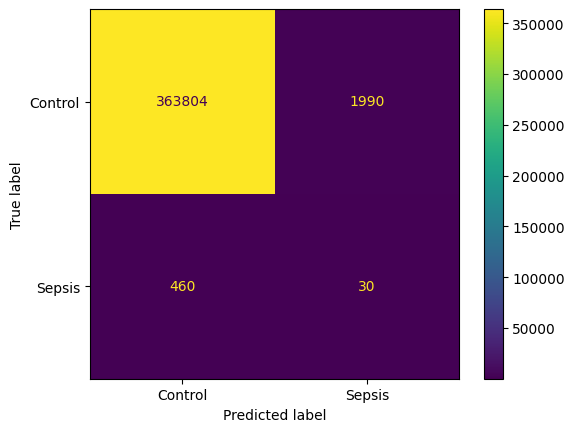

[CV 7/10; 285/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=45
[CV 7/10; 285/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=45;, score=(train=0.983, test=0.649) total time= 6.9min
[CV 8/10; 144/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=60;, score=(train=0.952, test=0.670) total time= 6.5min
[CV 6/10; 199/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=35
[CV 6/10; 199/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=35;, score=(train=0.916, test=0.733) total time= 1.5min
[CV 1/10; 206/288] START gamma=0, learning_rate=0.1, max_delta_

[CV 2/10; 216/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=60
[CV 2/10; 216/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=60;, score=(train=0.930, test=0.962) total time= 3.3min
[CV 4/10; 222/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=30
[CV 4/10; 222/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=30;, score=(train=0.957, test=0.883) total time= 5.0min
[CV 5/10; 229/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=5
[CV 5/10; 229/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimator

[CV 2/10; 279/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=15
[CV 2/10; 279/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=15;, score=(train=0.985, test=0.943) total time=11.5min
[CV 10/10; 285/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=45
[CV 10/10; 285/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=45;, score=(train=0.983, test=0.647) total time= 7.2min
[CV 2/10; 191/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=55;, score=(train=0.880, test=0.953) total time=  34.6s
[CV 9/10; 194/288] START gamma=0, learning_rate=0.1, max_delt

[CV 6/10; 221/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=25
[CV 6/10; 221/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=25;, score=(train=0.964, test=0.675) total time= 5.0min
[CV 2/10; 228/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=60
[CV 2/10; 228/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=60;, score=(train=0.956, test=0.948) total time= 5.3min
[CV 4/10; 235/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=35
[CV 4/10; 235/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimato

[CV 1/10; 240/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=60;, score=(train=0.962, test=0.893) total time= 5.4min
[CV 2/10; 246/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=600, reg_lambda=0, scale_pos_weight=30
[CV 2/10; 246/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=600, reg_lambda=0, scale_pos_weight=30;, score=(train=0.972, test=0.941) total time= 5.2min
[CV 10/10; 252/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=600, reg_lambda=0, scale_pos_weight=60
[CV 10/10; 252/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=600, reg_lambda=0, scale_pos_weight=60;, score=(train=0.973, test=0.663) total time= 3.4min
[CV 1/10; 258/288] START gamma=0, learning_rate=0.1, max_del

[CV 10/10; 229/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=5;, score=(train=0.970, test=0.688) total time= 6.1min
[CV 3/10; 236/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=40
[CV 3/10; 236/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=40;, score=(train=0.964, test=0.946) total time= 3.3min
[CV 8/10; 242/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=600, reg_lambda=0, scale_pos_weight=10
[CV 8/10; 242/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=600, reg_lambda=0, scale_pos_weight=10;, score=(train=0.978, test=0.665) total time= 3.4min
[CV 6/10; 248/288] START gamma=0, learning_rate=0.1, max_delta

[CV 2/10; 197/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=25;, score=(train=0.906, test=0.960) total time= 1.3min
[CV 6/10; 203/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=55
[CV 6/10; 203/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=55;, score=(train=0.914, test=0.728) total time= 1.7min
[CV 6/10; 209/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=25
[CV 6/10; 209/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=25;, score=(train=0.941, test=0.703) total time= 3.2min
[CV 5/10; 216/288] START gamma=0, learning_rate=0.1, max_delta

[CV 4/10; 142/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=8, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=50;, score=(train=0.945, test=0.887) total time= 5.4min
[CV 2/10; 189/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=45
[CV 2/10; 189/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=50, reg_lambda=0, scale_pos_weight=45;, score=(train=0.881, test=0.950) total time=  28.8s
[CV 2/10; 193/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=5
[CV 2/10; 193/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=5;, score=(train=0.901, test=0.954) total time=  34.2s
[CV 8/10; 197/288] START gamma=0, learning_rate=0.1, max_delta_step

[CV 9/10; 197/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=25;, score=(train=0.913, test=0.734) total time= 1.3min
[CV 3/10; 204/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=60
[CV 3/10; 204/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=100, reg_lambda=0, scale_pos_weight=60;, score=(train=0.905, test=0.961) total time= 1.5min
[CV 7/10; 210/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=30
[CV 7/10; 210/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=200, reg_lambda=0, scale_pos_weight=30;, score=(train=0.940, test=0.709) total time= 3.0min
[CV 3/10; 217/288] START gamma=0, learning_rate=0.1, max_delta

[CV 5/10; 288/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=60;, score=(train=0.983, test=0.666) total time= 6.7min
[CV 10/10; 217/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=5
[CV 10/10; 217/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=5;, score=(train=0.963, test=0.696) total time= 5.6min
[CV 5/10; 224/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=40
[CV 5/10; 224/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=400, reg_lambda=0, scale_pos_weight=40;, score=(train=0.962, test=0.687) total time=  44.0s
[CV 1/10; 231/288] START gamma=0, learning_rate=0.1, max_delta

[CV 8/10; 230/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=10;, score=(train=0.973, test=0.669) total time= 6.1min
[CV 1/10; 237/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=45
[CV 1/10; 237/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=500, reg_lambda=0, scale_pos_weight=45;, score=(train=0.963, test=0.892) total time= 4.5min
[CV 4/10; 243/288] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=600, reg_lambda=0, scale_pos_weight=15
[CV 4/10; 243/288] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=600, reg_lambda=0, scale_pos_weight=15;, score=(train=0.973, test=0.882) total time= 2.7min
[CV 10/10; 249/288] START gamma=0, learning_rate=0.1, max_delt

In [31]:
from xgboost import XGBClassifier
xgb_classifier_model = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = 15,
                           n_estimators=100,
                           max_depth=8,
                           eta=0.1,
                                     gamma=0,
                                     reg_lambda=0,
                           min_child_weight = 2,
                           max_delta_step= 2,
                           sampling_method= "uniform")
xgb_classifier_model.fit(X, y)
print(evaluation.get_df_metrics(xgb_classifier_model))
evaluation.plot_confusion_matrix(xgb_classifier_model)

In [ ]:
import time 

for i in range(10000):
    print("Sleep")
    time.sleep(60)

[CV 4/10; 628/648] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=42.12101505509855
[CV 4/10; 628/648] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=42.12101505509855;, score=(train=nan, test=nan) total time=   3.4s
[CV 3/10; 629/648] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=42.12101505509855
[CV 3/10; 629/648] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=42.12101505509855;, score=(train=nan, test=nan) total time=   3.4s
[CV 1/10; 630/648] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=42.12101505509855
[CV 1/10; 630/648] END gamma=0, learning_rate

[CV 2/10; 390/648] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=42.12101505509855
[CV 2/10; 390/648] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=42.12101505509855;, score=(train=nan, test=nan) total time=   3.3s
[CV 8/10; 391/648] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=42.12101505509855
[CV 8/10; 391/648] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=42.12101505509855;, score=(train=nan, test=nan) total time=   3.3s
[CV 3/10; 393/648] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=42.12101505509855
[CV 3/10; 393/648] END gamma=0, learning_ra

[CV 2/10; 627/648] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=42.12101505509855
[CV 2/10; 627/648] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=42.12101505509855;, score=(train=nan, test=nan) total time=   3.7s
[CV 1/10; 628/648] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=42.12101505509855
[CV 1/10; 628/648] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=42.12101505509855;, score=(train=nan, test=nan) total time=   3.7s
[CV 10/10; 628/648] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=42.12101505509855
[CV 10/10; 628/648] END gamma=0, learning_r

[CV 7/10; 547/648] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=42.12101505509855
[CV 7/10; 547/648] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=42.12101505509855;, score=(train=0.991, test=0.633) total time=12.7min
[CV 8/10; 616/648] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=42.12101505509855
[CV 8/10; 616/648] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=42.12101505509855;, score=(train=nan, test=nan) total time=   3.9s
[CV 8/10; 617/648] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=42.12101505509855
[CV 8/10; 617/648] END gamma=0, learn